## import libs , read data and show header

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read data and print first few rows

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## shape of our data

In [3]:
df.shape

(891, 12)

## data in details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## droping unnecessary columns

In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

## Impute missing values for Age and Embarked

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### plots of relation between survived and the categorical columns

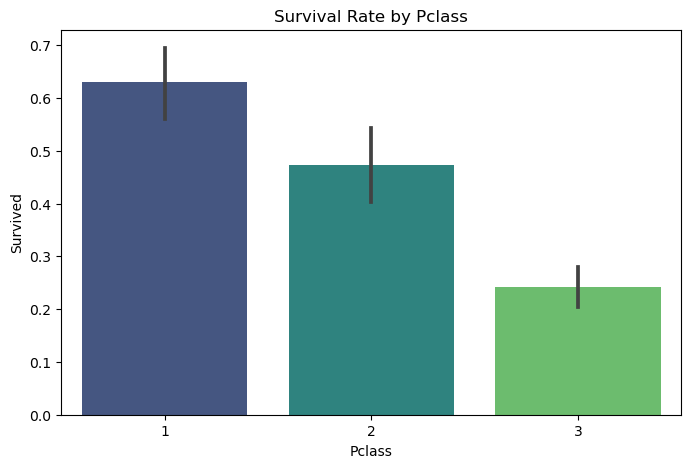

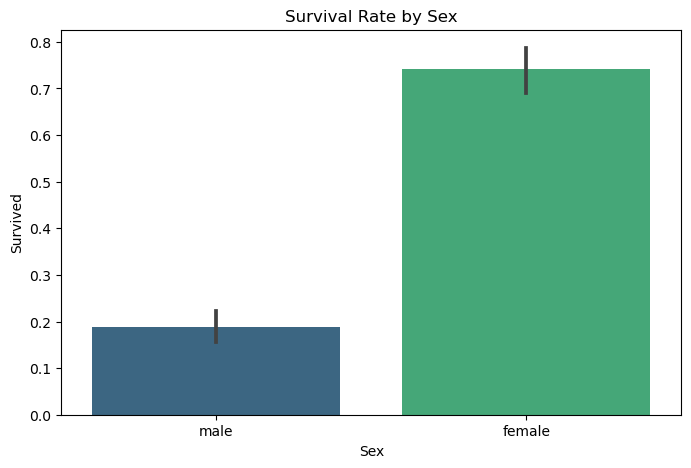

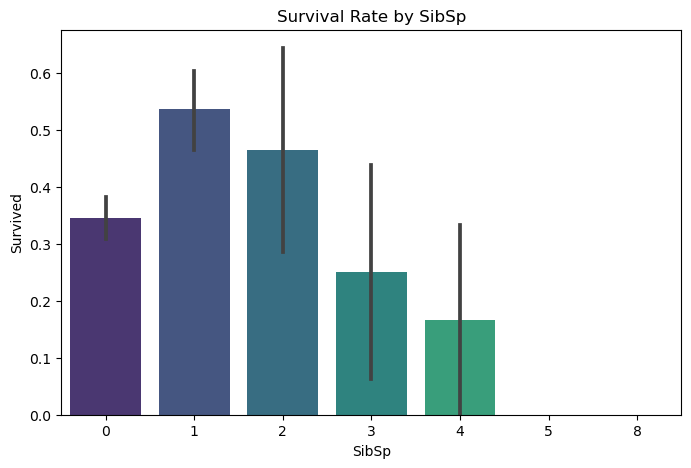

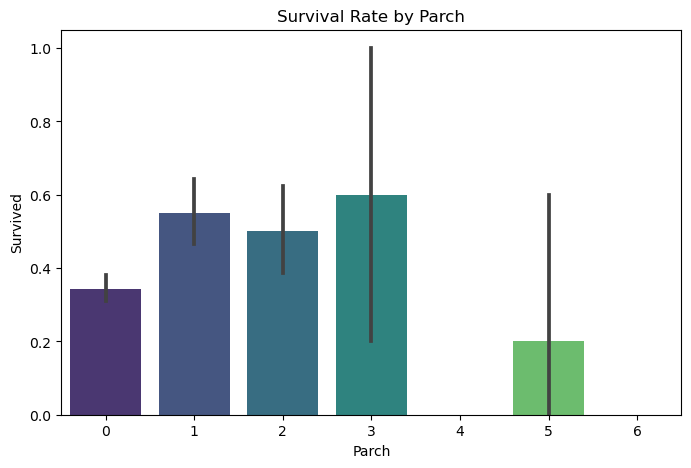

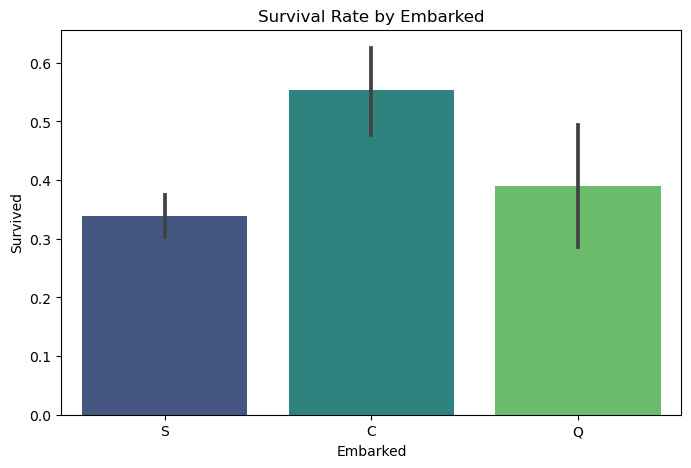

In [9]:
for column in df.columns:
    if column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=column, y='Survived', data=df, palette='viridis')
        plt.title(f'Survival Rate by {column}')
        plt.show()

### identify patterns and trends of Age and Fare

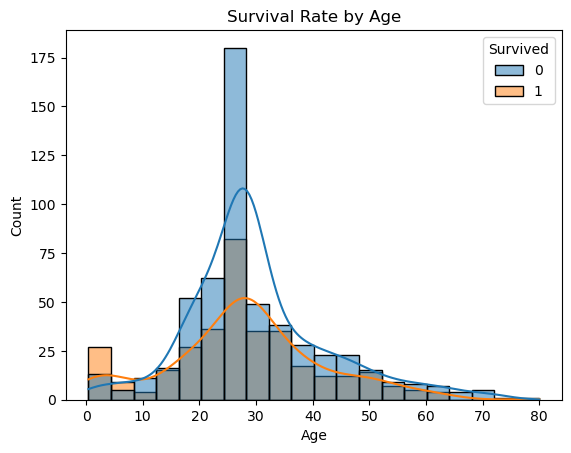

In [10]:
sns.histplot(x='Age', hue='Survived', data=df, bins=20, kde=True)
plt.title('Survival Rate by Age')
plt.show()

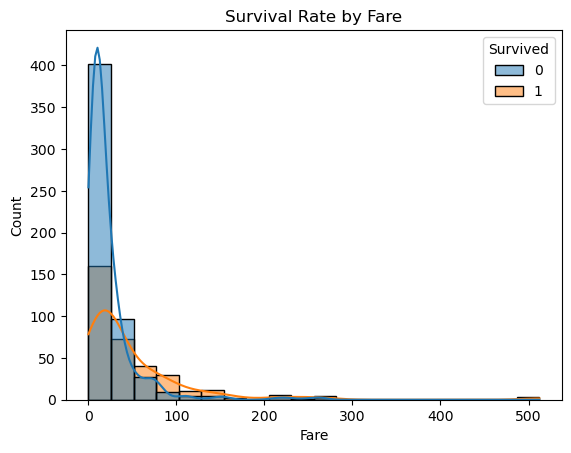

In [11]:
sns.histplot(x='Fare', hue='Survived', data=df, bins=20, kde=True)
plt.title('Survival Rate by Fare')
plt.show()

## import preprocessing libs

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler

## label encode Sex column

In [13]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

## Onehot encoding embarked column

In [14]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

## strandarize the Age and Fare

In [15]:
minmax_scaler = MinMaxScaler()
df[['Age', 'Fare']] = minmax_scaler.fit_transform(df[['Age', 'Fare']])